In [157]:
import pandas as pd
from sklearn.model_selection import train_test_split
train = pd.read_csv('train.csv', nrows=4000000)
train_data, test_data = train_test_split(train, test_size=0.2, random_state=42)
#randomly sample 80% your dataframe as training data
#use the rest of the data as validation data
train = train_data
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']

C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\2118258631.py:3: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv', nrows=4000000)


In [158]:
stats = []
for col in train.columns:
    stats.append((col, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0], train[col].value_counts(normalize=True, dropna=False).values[0] * 100, train[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
28,PuaMode,1,99.973375,99.973375,object
41,Census_ProcessorClass,3,99.592125,99.592125,object
8,DefaultBrowsersIdentifier,1331,95.125938,95.125938,float64
68,Census_IsFlightingInternal,2,83.037719,83.037719,float64
52,Census_InternalBatteryType,54,71.027375,71.027375,object
...,...,...,...,...,...
1,ProductName,6,0.000000,98.931000,object
45,Census_HasOpticalDiskDrive,2,0.000000,92.292344,int64
54,Census_OSVersion,382,0.000000,15.859219,object
55,Census_OSArchitecture,3,0.000000,90.841906,object


We can see that PuaMode , Census_ProcessorClass have 99% of missing vaues so they can be removed from the analysis.


In [159]:
good_cols = list(train.columns)
for col in train.columns:
    rate = train[col].value_counts(normalize=True, dropna=False).values[0]
    if rate > 0.9:
        good_cols.remove(col)

In [160]:
train = train[good_cols]


In [161]:
test_data= test_data[good_cols]

In [162]:
print(train.head())
#print(train['Census_OSEdition'])

                        MachineIdentifier EngineVersion        AppVersion  \
2088093  3bec85e0e3d5e2e2e86fbe16cde6bb12   1.1.15200.1  4.12.17007.18022   
96291    02c5a5fe3cfb9a0a27d373f50c6d0cae   1.1.15300.6   4.18.1807.18075   
113546   0344cf00d4e57a4ff3d112ee860feab7   1.1.15200.1   4.18.1807.18075   
3702826  6a42d82045509e1347da3f39a5b245dd   1.1.15100.1   4.18.1807.18075   
3689919  69e35786de49202d474429523d9865c9   1.1.15200.1   4.8.10240.17443   

        AvSigVersion  AVProductStatesIdentifier  AVProductsInstalled  \
2088093  1.275.898.0                    47238.0                  2.0   
96291      1.277.4.0                    53447.0                  1.0   
113546   1.275.981.0                    53447.0                  1.0   
3702826  1.273.810.0                    53447.0                  1.0   
3689919   1.275.26.0                    53447.0                  1.0   

         CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
2088093                 62        

In [163]:
train['AVProductStatesIdentifier'] = train['AVProductStatesIdentifier'].astype('category')
test_data['AVProductStatesIdentifier'] = test_data['AVProductStatesIdentifier'].astype('category')

C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\3153339919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['AVProductStatesIdentifier'] = train['AVProductStatesIdentifier'].astype('category')


In [164]:
train['CountryIdentifier'] = train['CountryIdentifier'].astype('category')
test_data['CountryIdentifier'] = test_data['CountryIdentifier'].astype('category')

C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\404507562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['CountryIdentifier'] = train['CountryIdentifier'].astype('category')


In [165]:
train['CityIdentifier'] = train['CityIdentifier'].astype('category')
test_data['CityIdentifier'] = test_data['CityIdentifier'].astype('category')

C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\3677329951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['CityIdentifier'] = train['CityIdentifier'].astype('category')


In [166]:
train['OrganizationIdentifier'] = train['OrganizationIdentifier'].astype('category')
test_data['OrganizationIdentifier'] = test_data['OrganizationIdentifier'].astype('category')

C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\3868114160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['OrganizationIdentifier'] = train['OrganizationIdentifier'].astype('category')


In [167]:
train['GeoNameIdentifier'] = train['GeoNameIdentifier'].astype('category')
test_data['GeoNameIdentifier'] = test_data['GeoNameIdentifier'].astype('category')

C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\1201385236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['GeoNameIdentifier'] = train['GeoNameIdentifier'].astype('category')


In [168]:
train['LocaleEnglishNameIdentifier'] = train['LocaleEnglishNameIdentifier'].astype('category')
test_data['LocaleEnglishNameIdentifier'] = test_data['LocaleEnglishNameIdentifier'].astype('category')

C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\328959866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['LocaleEnglishNameIdentifier'] = train['LocaleEnglishNameIdentifier'].astype('category')


In [169]:
train['IeVerIdentifier'] = train['IeVerIdentifier'].astype('category')
test_data['IeVerIdentifier'] = test_data['IeVerIdentifier'].astype('category')

C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\3097715943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['IeVerIdentifier'] = train['IeVerIdentifier'].astype('category')


In [170]:
train['Census_OEMNameIdentifier'] = train['Census_OEMNameIdentifier'].astype('category')
test_data['Census_OEMNameIdentifier'] = test_data['Census_OEMNameIdentifier'].astype('category')

C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\9983864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Census_OEMNameIdentifier'] = train['Census_OEMNameIdentifier'].astype('category')


In [171]:
train['Census_OEMModelIdentifier'] = train['Census_OEMModelIdentifier'].astype('category')
test_data['Census_OEMModelIdentifier'] = test_data['Census_OEMModelIdentifier'].astype('category')

C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\2613291456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Census_OEMModelIdentifier'] = train['Census_OEMModelIdentifier'].astype('category')


In [172]:
train['Census_ProcessorModelIdentifier'] = train['Census_ProcessorModelIdentifier'].astype('category')
test_data['Census_ProcessorModelIdentifier'] = test_data['Census_ProcessorModelIdentifier'].astype('category')

C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\383487679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Census_ProcessorModelIdentifier'] = train['Census_ProcessorModelIdentifier'].astype('category')


In [173]:
train['Census_InternalBatteryNumberOfCharges'] = train['Census_InternalBatteryNumberOfCharges'].astype('category')
test_data['Census_InternalBatteryNumberOfCharges'] = test_data['Census_InternalBatteryNumberOfCharges'].astype('category')

C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\2682796365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Census_InternalBatteryNumberOfCharges'] = train['Census_InternalBatteryNumberOfCharges'].astype('category')


In [176]:
train['Census_OSBuildNumber'] = train['Census_OSBuildNumber'].astype('category')
test_data['Census_OSBuildNumber'] = test_data['Census_OSBuildNumber'].astype('category')

C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\51552932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Census_OSBuildNumber'] = train['Census_OSBuildNumber'].astype('category')


In [177]:
train['Census_OSBuildRevision'] = train['Census_OSBuildRevision'].astype('category')
test_data['Census_OSBuildRevision'] = test_data['Census_OSBuildRevision'].astype('category')

C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\2290077691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Census_OSBuildRevision'] = train['Census_OSBuildRevision'].astype('category')


In [178]:
train['Census_FirmwareManufacturerIdentifier'] = train['Census_FirmwareManufacturerIdentifier'].astype('category')
test_data['Census_FirmwareManufacturerIdentifier'] = test_data['Census_FirmwareManufacturerIdentifier'].astype('category')

C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\750082928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Census_FirmwareManufacturerIdentifier'] = train['Census_FirmwareManufacturerIdentifier'].astype('category')


In [179]:
train['Census_FirmwareVersionIdentifier'] = train['Census_FirmwareVersionIdentifier'].astype('category')
test_data['Census_FirmwareVersionIdentifier'] = test_data['Census_FirmwareVersionIdentifier'].astype('category')

C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\2025037295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Census_FirmwareVersionIdentifier'] = train['Census_FirmwareVersionIdentifier'].astype('category')


In [180]:
train['OsBuild'] = train['OsBuild'].astype('category')
test_data['OsBuild'] = test_data['OsBuild'].astype('category')

C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\998034835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['OsBuild'] = train['OsBuild'].astype('category')


In [181]:
print(train['Census_InternalBatteryType'])

2088093     NaN
96291       NaN
113546      NaN
3702826     NaN
3689919    lion
           ... 
2356330     NaN
3511566    lion
2229084    li-i
2768307     NaN
2219110     NaN
Name: Census_InternalBatteryType, Length: 3200000, dtype: object


In [182]:
print(train.columns)

Index(['MachineIdentifier', 'EngineVersion', 'AppVersion', 'AvSigVersion',
       'AVProductStatesIdentifier', 'AVProductsInstalled', 'CountryIdentifier',
       'CityIdentifier', 'OrganizationIdentifier', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'OsBuild', 'OsSuite',
       'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'IeVerIdentifier',
       'SmartScreen', 'Census_MDC2FormFactor', 'Census_OEMNameIdentifier',
       'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity',
       'Census_TotalPhysicalRAM', 'Census_ChassisTypeName',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_PowerPlatformRoleName', 'Census_InternalBat

In [183]:
train= train.drop(columns=['Census_InternalBatteryType'])
test_data= test_data.drop(columns=['Census_InternalBatteryType'])

In [184]:
train['Census_OSEdition'] = train['Census_OSEdition'].astype(str)
test_data['Census_OSEdition'] = test_data['Census_OSEdition'].astype(str)
train['Census_OSEdition'] = train['Census_OSEdition'].astype('category')
test_data['Census_OSEdition'] = test_data['Census_OSEdition'].astype('category')

In [185]:
train['Census_OSSkuName'] = train['Census_OSSkuName'].astype(str)
test_data['Census_OSSkuName'] = test_data['Census_OSSkuName'].astype(str)
train['Census_OSSkuName'] = train['Census_OSSkuName'].astype('category')
test_data['Census_OSSkuName'] = test_data['Census_OSSkuName'].astype('category')

In [186]:
train['Census_OSInstallLanguageIdentifier'] = train['Census_OSInstallLanguageIdentifier'].astype('category')
test_data['Census_OSInstallLanguageIdentifier'] = test_data['Census_OSInstallLanguageIdentifier'].astype('category')

In [187]:
train['Census_OSUILocaleIdentifier'] = train['Census_OSUILocaleIdentifier'].astype('category')
test_data['Census_OSUILocaleIdentifier'] = test_data['Census_OSUILocaleIdentifier'].astype('category')

In [188]:
train['OsSuite'] = train['OsSuite'].astype('category')
test_data['OsSuite'] = test_data['OsSuite'].astype('category')

In [189]:
train['Wdft_RegionIdentifier'] = train['Wdft_RegionIdentifier'].astype('category')
test_data['Wdft_RegionIdentifier'] = test_data['Wdft_RegionIdentifier'].astype('category')

In [190]:
train['SkuEdition'].value_counts(dropna=False, normalize=True)

SkuEdition
Home               0.617989
Pro                0.361489
Invalid            0.008771
Education          0.004544
Enterprise         0.003864
Enterprise LTSB    0.002310
Cloud              0.000623
Server             0.000410
Name: proportion, dtype: float64

In [191]:
train['OsBuildLab']= train['OsBuildLab'].astype('category')
test_data['OsBuildLab']= test_data['OsBuildLab'].astype('category')

In [192]:
train['OsBuildLab'] = train['OsBuildLab'].cat.add_categories(['0.0.0.0.0-0'])
train['OsBuildLab'] = train['OsBuildLab'].fillna('0.0.0.0.0-0')
test_data['OsBuildLab'] = test_data['OsBuildLab'].cat.add_categories(['0.0.0.0.0-0'])
test_data['OsBuildLab'] = test_data['OsBuildLab'].fillna('0.0.0.0.0-0')

In [193]:
def fe(df):
    df['EngineVersion_2'] = df['EngineVersion'].apply(lambda x: x.split('.')[2]).astype('category')
    df['EngineVersion_3'] = df['EngineVersion'].apply(lambda x: x.split('.')[3]).astype('category')

    df['AppVersion_1'] = df['AppVersion'].apply(lambda x: x.split('.')[1]).astype('category')
    df['AppVersion_2'] = df['AppVersion'].apply(lambda x: x.split('.')[2]).astype('category')
    df['AppVersion_3'] = df['AppVersion'].apply(lambda x: x.split('.')[3]).astype('category')

    df['AvSigVersion_0'] = df['AvSigVersion'].apply(lambda x: x.split('.')[0]).astype('category')
    df['AvSigVersion_1'] = df['AvSigVersion'].apply(lambda x: x.split('.')[1]).astype('category')
    df['AvSigVersion_2'] = df['AvSigVersion'].apply(lambda x: x.split('.')[2]).astype('category')

    df['OsBuildLab_0'] = df['OsBuildLab'].apply(lambda x: x.split('.')[0]).astype('category')
    df['OsBuildLab_1'] = df['OsBuildLab'].apply(lambda x: x.split('.')[1]).astype('category')
    df['OsBuildLab_2'] = df['OsBuildLab'].apply(lambda x: x.split('.')[2]).astype('category')
    df['OsBuildLab_3'] = df['OsBuildLab'].apply(lambda x: x.split('.')[3]).astype('category')
    # df['OsBuildLab_40'] = df['OsBuildLab'].apply(lambda x: x.split('.')[-1].split('-')[0]).astype('category')
    # df['OsBuildLab_41'] = df['OsBuildLab'].apply(lambda x: x.split('.')[-1].split('-')[1]).astype('category')

    df['Census_OSVersion_0'] = df['Census_OSVersion'].apply(lambda x: x.split('.')[0]).astype('category')
    df['Census_OSVersion_1'] = df['Census_OSVersion'].apply(lambda x: x.split('.')[1]).astype('category')
    df['Census_OSVersion_2'] = df['Census_OSVersion'].apply(lambda x: x.split('.')[2]).astype('category')
    df['Census_OSVersion_3'] = df['Census_OSVersion'].apply(lambda x: x.split('.')[3]).astype('category')

     #https://www.kaggle.com/adityaecdrid/simple-feature-engineering-xd
    df['primary_drive_c_ratio'] = df['Census_SystemVolumeTotalCapacity']/ df['Census_PrimaryDiskTotalCapacity']
    df['non_primary_drive_MB'] = df['Census_PrimaryDiskTotalCapacity'] - df['Census_SystemVolumeTotalCapacity']

    df['aspect_ratio'] = df['Census_InternalPrimaryDisplayResolutionHorizontal']/ df['Census_InternalPrimaryDisplayResolutionVertical']

    df['monitor_dims'] = df['Census_InternalPrimaryDisplayResolutionHorizontal'].astype(str) + '*' + df['Census_InternalPrimaryDisplayResolutionVertical'].astype('str')
    df['monitor_dims'] = df['monitor_dims'].astype('category')

    df['dpi'] = ((df['Census_InternalPrimaryDisplayResolutionHorizontal']**2 + df['Census_InternalPrimaryDisplayResolutionVertical']**2)**.5)/(df['Census_InternalPrimaryDiagonalDisplaySizeInInches'])

    df['dpi_square'] = df['dpi'] ** 2

    df['MegaPixels'] = (df['Census_InternalPrimaryDisplayResolutionHorizontal'] * df['Census_InternalPrimaryDisplayResolutionVertical'])/1e6

    df['Screen_Area'] = (df['aspect_ratio']* (df['Census_InternalPrimaryDiagonalDisplaySizeInInches']**2))/(df['aspect_ratio']**2 + 1)

    df['ram_per_processor'] = df['Census_TotalPhysicalRAM']/ df['Census_ProcessorCoreCount']

    df['new_num_0'] = df['Census_InternalPrimaryDiagonalDisplaySizeInInches'] / df['Census_ProcessorCoreCount']

    df['new_num_1'] = df['Census_ProcessorCoreCount'] * df['Census_InternalPrimaryDiagonalDisplaySizeInInches']
    
    df['Census_IsFlightingInternal'] = df['Census_IsFlightingInternal'].fillna(1)
    df['Census_ThresholdOptIn'] = df['Census_ThresholdOptIn'].fillna(1)
    df['Census_IsWIMBootEnabled'] = df['Census_IsWIMBootEnabled'].fillna(1)
    df['Wdft_IsGamer'] = df['Wdft_IsGamer'].fillna(0)
    
    return df

In [194]:
train = fe(train)
test = fe(test_data)

In [195]:
#check for null values in train 
#iterate thorugh each column of train and test remove samples with null values 
#check for null values in test
#iterate thorugh each column of train and test remove samples with null values
train = train.dropna()
test = test.dropna()
null_counts = train.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
MachineIdentifier            0
EngineVersion                0
AppVersion                   0
AvSigVersion                 0
AVProductStatesIdentifier    0
                            ..
MegaPixels                   0
Screen_Area                  0
ram_per_processor            0
new_num_0                    0
new_num_1                    0
Length: 83, dtype: int64


In [196]:
cat_cols = [col for col in train.columns if col not in ['MachineIdentifier', 'Census_SystemVolumeTotalCapacity', 'HasDetections'] and str(train[col].dtype) == 'category']
len(cat_cols)

40

In [197]:
more_cat_cols = []
add_cat_feats = [
 'Census_OSBuildRevision',
 'OsBuildLab',
 'SmartScreen',
'AVProductsInstalled']
for col1 in add_cat_feats:
    for col2 in add_cat_feats:
        if col1 != col2:
            train[col1 + '__' + col2] = train[col1].astype(str) + train[col2].astype(str)
            train[col1 + '__' + col2] = train[col1 + '__' + col2].astype('category')
            
            test[col1 + '__' + col2] = test[col1].astype(str) + test[col2].astype(str)
            test[col1 + '__' + col2] = test[col1 + '__' + col2].astype('category')
            more_cat_cols.append(col1 + '__' + col2)
            
cat_cols = cat_cols + more_cat_cols

C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\3659823727.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col1 + '__' + col2] = test[col1].astype(str) + test[col2].astype(str)
C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\3659823727.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col1 + '__' + col2] = test[col1 + '__' + col2].astype('category')
C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\3659823727.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [198]:

to_encode = []
#print all the columns which have data types as category
#
 
print(train['EngineVersion'].dtype)
train['EngineVersion']= train['EngineVersion'].astype('category')
test['EngineVersion']= test['EngineVersion'].astype('category')
train['AppVersion']= train['AppVersion'].astype('category')
test['AppVersion']= test['AppVersion'].astype('category')
train['AvSigVersion']= train['AvSigVersion'].astype('category')
test['AvSigVersion']= test['AvSigVersion'].astype('category')
cat_cols = [col for col in train.columns if col not in ['MachineIdentifier', 'Census_SystemVolumeTotalCapacity', 'HasDetections'] and str(train[col].dtype) == 'category']
if('AvSigVersion' in cat_cols):
    print("AvSigVersion is in cat_cols")
for col in cat_cols:
    if train[col].nunique() > 1000:
        print(col, train[col].nunique())
        to_encode.append(col)

object


C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\51846927.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['EngineVersion']= test['EngineVersion'].astype('category')
C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\51846927.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['AppVersion']= test['AppVersion'].astype('category')
C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\51846927.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

AvSigVersion is in cat_cols
AvSigVersion 7865
AVProductStatesIdentifier 10562
CityIdentifier 50235
Census_OEMNameIdentifier 1831
Census_OEMModelIdentifier 63312
Census_ProcessorModelIdentifier 2276
Census_InternalBatteryNumberOfCharges 10595
Census_FirmwareVersionIdentifier 27956
AvSigVersion_2 2593
Census_OSBuildRevision__OsBuildLab 5806
Census_OSBuildRevision__SmartScreen 1125
OsBuildLab__Census_OSBuildRevision 5806
OsBuildLab__SmartScreen 1265
OsBuildLab__AVProductsInstalled 1036
SmartScreen__Census_OSBuildRevision 1125
SmartScreen__OsBuildLab 1265
AVProductsInstalled__OsBuildLab 1036


In [199]:
#do a frequency encoding of to_encode columns 
print(to_encode)
for col in to_encode:
    freq_enc = train[col].value_counts(dropna=False).to_dict()
    train[col + '_freq'] = train[col].map(freq_enc)
    test[col + '_freq'] = test[col].map(freq_enc)
    cat_cols.remove(col)
    cat_cols.append(col + '_freq')

['AvSigVersion', 'AVProductStatesIdentifier', 'CityIdentifier', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorModelIdentifier', 'Census_InternalBatteryNumberOfCharges', 'Census_FirmwareVersionIdentifier', 'AvSigVersion_2', 'Census_OSBuildRevision__OsBuildLab', 'Census_OSBuildRevision__SmartScreen', 'OsBuildLab__Census_OSBuildRevision', 'OsBuildLab__SmartScreen', 'OsBuildLab__AVProductsInstalled', 'SmartScreen__Census_OSBuildRevision', 'SmartScreen__OsBuildLab', 'AVProductsInstalled__OsBuildLab']


C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\1381653301.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col + '_freq'] = test[col].map(freq_enc)
C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\1381653301.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col + '_freq'] = test[col].map(freq_enc)
C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\1381653301.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [200]:
#search for categorical columns in train and test data and use label encoding in them 
train.head()
train.drop(columns=['MachineIdentifier'], inplace=True)
test.drop(columns=['MachineIdentifier'], inplace=True)

C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\3825454091.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns=['MachineIdentifier'], inplace=True)


In [201]:
train.head()
if('AvSigVersion' in train.columns):
    
    train.drop(columns=['AvSigVersion'], inplace=True)
if('AvSigVersion' in test.columns):
    test.drop(columns=['AvSigVersion'], inplace=True)
if 'AppVersion' in train.columns:
    train.drop(columns=['AppVersion'], inplace=True)
if 'AppVersion' in test.columns:
    test.drop(columns=['AppVersion'], inplace=True)
if 'EngineVersion' in train.columns:
    train.drop(columns=['EngineVersion'], inplace=True)
if 'EngineVersion' in test.columns:
    test.drop(columns=['EngineVersion'], inplace=True)

C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\216551669.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns=['AvSigVersion'], inplace=True)
C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\216551669.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns=['AppVersion'], inplace=True)
C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\216551669.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [202]:
train.head()

,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,OsPlatformSubRelease,...,Census_FirmwareVersionIdentifier_freq,AvSigVersion_2_freq,Census_OSBuildRevision__OsBuildLab_freq,Census_OSBuildRevision__SmartScreen_freq,OsBuildLab__Census_OSBuildRevision_freq,OsBuildLab__SmartScreen_freq,OsBuildLab__AVProductsInstalled_freq,SmartScreen__Census_OSBuildRevision_freq,SmartScreen__OsBuildLab_freq,AVProductsInstalled__OsBuildLab_freq
2088093,47238.0,2.0,62,118260.0,27.0,88.0,80,14393,768,rs1,...,6213,786,3189,3398,3189,2868,1262,3398,2868,1262
1943665,53447.0,1.0,220,24282.0,27.0,237.0,72,17134,256,rs4,...,866,7126,152,6510,152,90083,265225,6510,90083,265225
3659700,53447.0,1.0,141,66620.0,27.0,167.0,227,16299,768,rs3,...,2514,5427,50917,44462,50917,105664,95182,44462,105664,95182
2301939,53447.0,1.0,29,14277.0,18.0,35.0,171,17134,256,rs4,...,5,3692,43489,1388,43489,15902,265225,1388,15902,265225
3167310,53447.0,1.0,68,22544.0,27.0,276.0,74,17134,256,rs4,...,2859,3831,8170,5930,8170,285549,265225,5930,285549,265225


In [207]:
#convert category columns to numbers 
#print(train.dtypes)
#use label encoding for categorical columns
from sklearn.preprocessing import LabelEncoder
cat_cols = train.select_dtypes(include=['category','string', 'object']).columns
for col in cat_cols:
      combined = pd.concat([train[col], test[col]], axis=0)
      le = LabelEncoder()
      le.fit(combined)

    # Transform the columns individually
      train[col] = le.transform(train[col])
      test[col] = le.transform(test[col])
#find all columns with category = 'category'
#convert them to numbers
#use label encoding for categorical columns
cat_cols = train.select_dtypes(include=['category']).columns
for col in cat_cols:
    le = LabelEncoder()

    # Step 3: Combine train and test data for fitting
    combined = pd.concat([train[col], test[col]], axis=0)

    # Fit the encoder on the combined data
    le.fit(combined)

    # Step 4: Transform train and test data individually
    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])

print(train.dtypes)
print(train.head())

C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\174029328.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col] = le.transform(test[col])
C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\174029328.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col] = le.transform(test[col])
C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\174029328.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

AVProductStatesIdentifier                     int64
AVProductsInstalled                         float64
CountryIdentifier                             int64
CityIdentifier                                int64
OrganizationIdentifier                        int64
                                             ...   
OsBuildLab__SmartScreen_freq                  int64
OsBuildLab__AVProductsInstalled_freq          int64
SmartScreen__Census_OSBuildRevision_freq      int64
SmartScreen__OsBuildLab_freq                  int64
AVProductsInstalled__OsBuildLab_freq          int64
Length: 108, dtype: object
         AVProductStatesIdentifier  AVProductsInstalled  CountryIdentifier  \
2088093                       7558                  2.0                 60   
1943665                       8902                  1.0                209   
3659700                       8902                  1.0                136   
2301939                       8902                  1.0                 27   
3167310    

C:\Users\risha_l\AppData\Local\Temp\ipykernel_54116\174029328.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col] = le.transform(test[col])


In [208]:
train.head()
print(train['OsPlatformSubRelease'].dtype)

int32


In [209]:
y= train['HasDetections']
train = train.drop(['HasDetections'], axis=1)
y_test= test['HasDetections']
#Make first 80% of the train data as train rest as validation data 
X_train = train

test = test.drop(['HasDetections'], axis=1)
X_test = test

In [210]:
#import startifiedKFold
from sklearn.model_selection import StratifiedKFold
n_folds=5
folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=15)


In [211]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
accuracies=[]
def stratified_kfold_rf_with_test(X, y, X_test, n_splits, random_state, params):
    from sklearn.model_selection import StratifiedKFold
    from sklearn.ensemble import RandomForestClassifier
    import numpy as np

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    y_test_pred = np.zeros(X_test.shape[0])
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        print(f"Fold {fold + 1}")
        
        # Split data into train and validation sets using .iloc for integer indexing
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # Train the model
        model = RandomForestClassifier(**params)
        model.fit(X_train, y_train)

        # Predict on validation set
        y_val_pred = model.predict(X_val)
        print(classification_report(y_val, y_val_pred))
        # Predict on test set
        y_test_pred += model.predict(X_test) / n_splits

    return y_test_pred


In [212]:
parms = {'n_estimators': 100 , 'max_depth': 10, 'random_state': 0}

In [213]:
# Get columns with string or object types
string_columns = X_train.select_dtypes(include=['object', 'string']).columns

print(f"Columns with string data: {string_columns}")


Columns with string data: Index([], dtype='object')


In [242]:
result_dict = stratified_kfold_rf_with_test(X=X_train, y=y, X_test=test, n_splits=5, random_state=42, params=parms)

Fold 1
              precision    recall  f1-score   support

           0       0.64      0.70      0.67    122740
           1       0.68      0.62      0.65    128557

    accuracy                           0.66    251297
   macro avg       0.66      0.66      0.66    251297
weighted avg       0.66      0.66      0.66    251297

Fold 2
              precision    recall  f1-score   support

           0       0.64      0.70      0.67    122740
           1       0.69      0.62      0.65    128557

    accuracy                           0.66    251297
   macro avg       0.66      0.66      0.66    251297
weighted avg       0.66      0.66      0.66    251297

Fold 3
              precision    recall  f1-score   support

           0       0.64      0.70      0.67    122740
           1       0.68      0.62      0.65    128556

    accuracy                           0.66    251296
   macro avg       0.66      0.66      0.66    251296
weighted avg       0.66      0.66      0.66    251296

In [243]:
#round y_test 
#round result_dict to 1 or 0 
import numpy as np
proablities = result_dict.copy()
result_dict1 = np.round(result_dict)
accuracy1 = accuracy_score(y_test, result_dict1)
print(f"Accuracy: {accuracy1}")

Accuracy: 0.6586490623804057


In [244]:

from sklearn.metrics import roc_auc_score
auc_value = roc_auc_score(y_test, result_dict1)
print(f"AUC: {auc_value}")


AUC: 0.6598451743196546


0.0 1.0


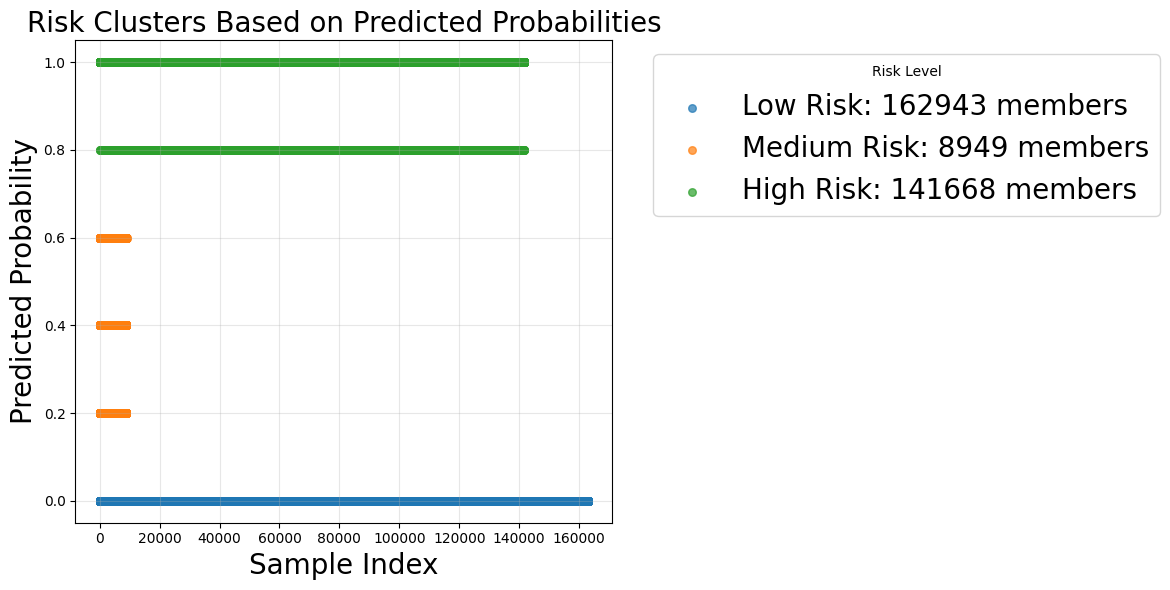

In [258]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd


kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(proablities.reshape(-1, 1))


print(np.min(proablities), np.max(proablities))
cluster_map = {cluster: rank for rank, cluster in enumerate(np.argsort(kmeans.cluster_centers_.flatten()))}
risk_labels = np.array(["Low Risk", "Medium Risk", "High Risk"])[[cluster_map[label] for label in labels]]


data = pd.DataFrame({
    "Probability": proablities,
    "Risk Cluster": risk_labels
})


cluster_counts = data["Risk Cluster"].value_counts()


plt.figure(figsize=(12, 6))
for risk in ["Low Risk", "Medium Risk", "High Risk"]:
    cluster_data = data[data["Risk Cluster"] == risk]
    plt.scatter(
        np.arange(len(cluster_data)),  
        cluster_data["Probability"], 
        label=risk,
        s=30,  
        alpha=0.7, 
       
    )


custom_labels = [
    f"Low Risk: {cluster_counts.get('Low Risk', 0)} members",
    f"Medium Risk: {cluster_counts.get('Medium Risk', 0)} members",
    f"High Risk: {cluster_counts.get('High Risk', 0)} members"
]


plt.legend(custom_labels, title="Risk Level", loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=20)


plt.title("Risk Clusters Based on Predicted Probabilities", fontsize=20)
plt.xlabel("Sample Index", fontsize=20)
plt.ylabel("Predicted Probability", fontsize=20)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


C:\Users\risha_l\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\risha_l\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\risha_l\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\risha_l\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit

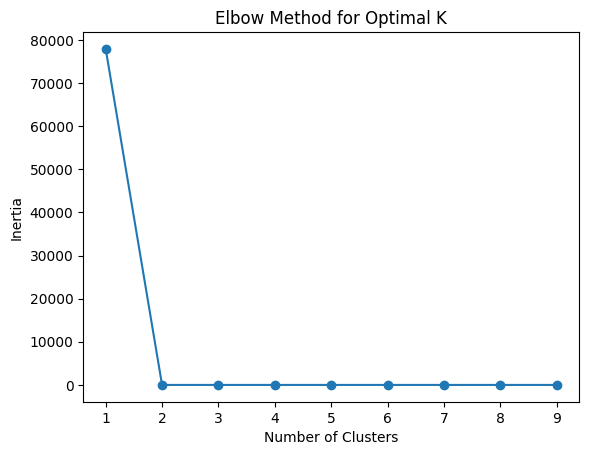

In [240]:
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(proablities.reshape(-1, 1))
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [70]:
!jupyter nbextension enable --py widgetsnbextension


usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

optional arguments:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook run server troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


In [76]:
print(train.dtypes)


MachineIdentifier              object
EngineVersion                  object
AppVersion                     object
AvSigVersion                   object
AVProductStatesIdentifier    category
                               ...   
MegaPixels                    float64
Screen_Area                   float64
ram_per_processor             float64
new_num_0                     float64
new_num_1                     float64
Length: 84, dtype: object


In [1]:
pip install kaggle

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105796 sha256=25f4ce54a608c1929d6b7891180d4ac7cf255d3df7068ac71aca29a6802582e4
  Stored in directory: c:\users\risha_l\appdata\local\pip\cache\wheels\46\d2\26\84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.
